In [1]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten

In [2]:
directories=os.listdir('data')
print(directories)

['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily']


In [3]:
images_count=0
for directory in directories:
    files=list(os.listdir('data/'+ directory))
    print(directory+' has '+str(len(files))+' images')
    images_count+=len(files)

astilbe has 726 images
bellflower has 872 images
black_eyed_susan has 986 images
calendula has 1011 images
california_poppy has 1021 images
carnation has 924 images
common_daisy has 978 images
coreopsis has 1035 images
dandelion has 1038 images
iris has 1041 images
rose has 986 images
sunflower has 1013 images
tulip has 1034 images
water_lily has 977 images


In [4]:
print(images_count)

13642


In [5]:
base_directory='data/'
img_height = 180
img_width = 180
batch_size = 32

In [6]:
train_ds=tf.keras.utils.image_dataset_from_directory(base_directory,
                                                          seed=123,
                                                          validation_split=0.2,
                                                          subset='training',
                                                          batch_size=batch_size,
                                                          image_size=(img_height,img_width))

Found 13642 files belonging to 14 classes.
Using 10914 files for training.


In [7]:
val_ds=tf.keras.utils.image_dataset_from_directory(base_directory,
                                                          seed=123,
                                                          validation_split=0.2,
                                                          subset='validation',
                                                          batch_size=batch_size,
                                                          image_size=(img_height,img_width))

Found 13642 files belonging to 14 classes.
Using 2728 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily']


In [9]:
class_names = val_ds.class_names
print(class_names)

['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily']


In [10]:
import matplotlib.pyplot as plt

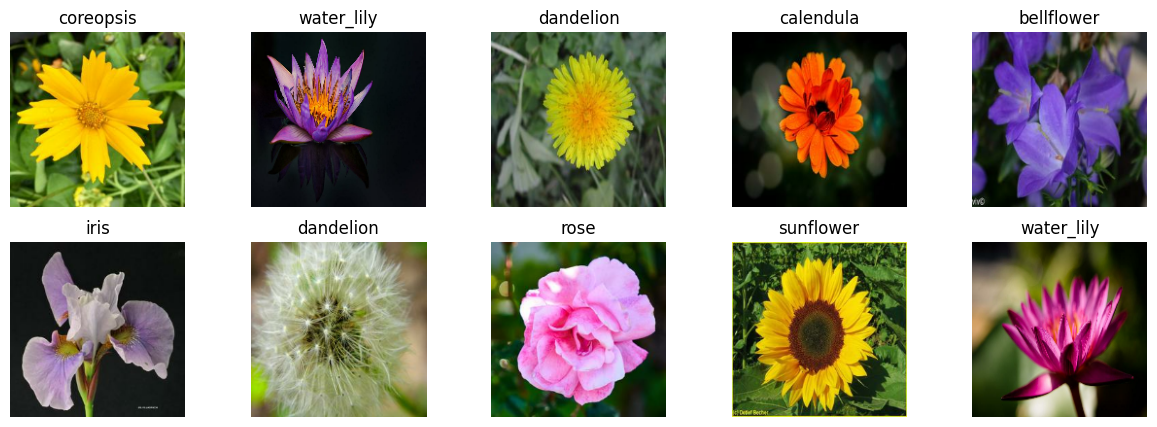

In [11]:
plt.figure(figsize=(15, 5))
for images, labels in train_ds.take(1):
  for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
normalization_layer = layers.Rescaling(1./255)

In [15]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [17]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,990,446 (15.22 MB)

 Trainable params: 3,990,446 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 43s 120ms/step - accuracy: 0.3300 - loss: 1.9574 - val_accuracy: 0.5308 - val_loss: 1.3802
Epoch 2/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 48s 141ms/step - accuracy: 0.5940 - loss: 1.2146 - val_accuracy: 0.6118 - val_loss: 1.1492
Epoch 3/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 44s 129ms/step - accuracy: 0.7181 - loss: 0.8490 - val_accuracy: 0.6188 - val_loss: 1.1783
Epoch 4/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 46s 135ms/step - accuracy: 0.8341 - loss: 0.5231 - val_accuracy: 0.6221 - val_loss: 1.2441
Epoch 5/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 51s 149ms/step - accuracy: 0.9026 - loss: 0.3059 - val_accuracy: 0.6415 - val_loss: 1.3615
Epoch 6/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 48s 140ms/step - accuracy: 0.9529 - loss: 0.1526 - val_accuracy: 0.6089 - val_loss: 1.7531
Epoch 7/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 43s 127ms/step - accuracy: 0.9658 - loss: 0.1136 - val_accuracy: 0.6092 - val_loss: 1.9481
Epoch 8/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 44s 128ms/step - accuracy: 0.9729 - loss: 0

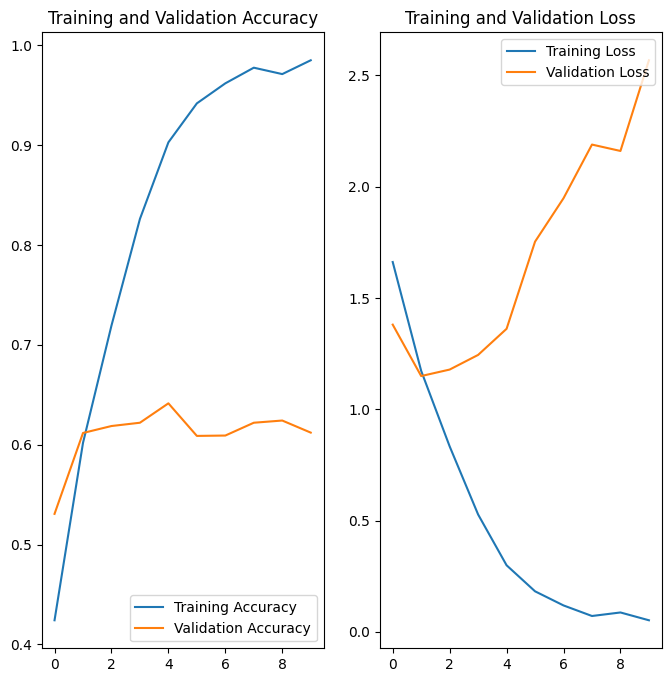

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

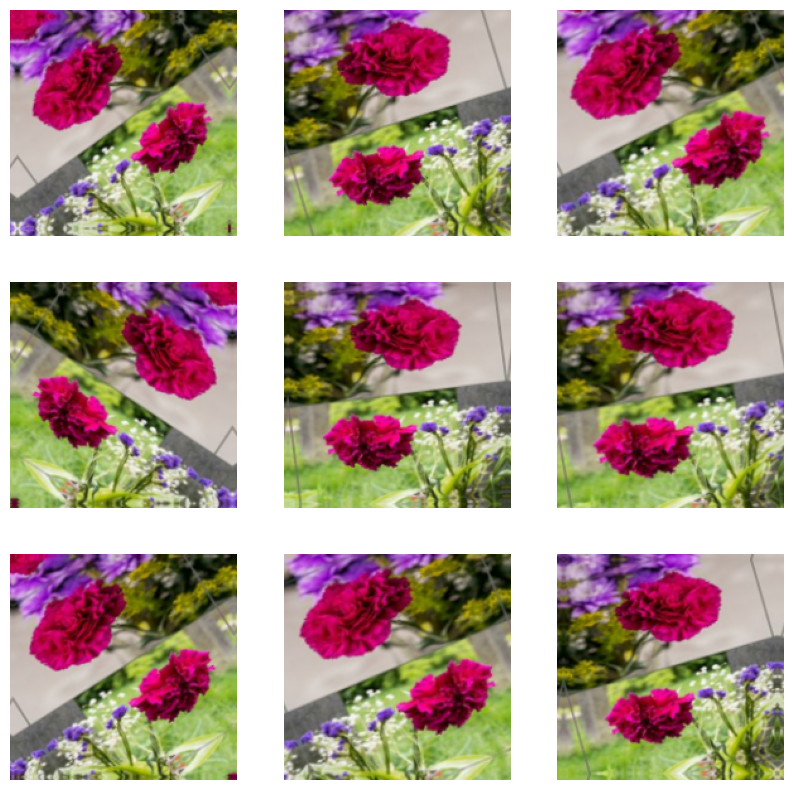

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [24]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + class_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [25]:
classify_images('Sample/rose/4373364544_ef9509ae1b_c.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


'The Image belongs to carnation with a score of 56.71392'

In [26]:
classify_images('Sample/water_lily/23470942380_ff66cc6c0f_c.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


'The Image belongs to water_lily with a score of 85.477036'

In [27]:
classify_images('Sample/common_daisy/4890220427_268fcc1dea_c.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


'The Image belongs to common_daisy with a score of 52.404892'

In [28]:
classify_images('Sample/common_daisy/47545720792_71341560b0_c.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


'The Image belongs to common_daisy with a score of 92.43646'

In [29]:
classify_images('Sample/coreopsis/3060589752_3a7c27f250_c.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


'The Image belongs to black_eyed_susan with a score of 96.5099'

In [31]:
classify_images('Sample/images.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


'The Image belongs to carnation with a score of 99.03412'

In [32]:
classify_images('Sample/house.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


'The Image belongs to bellflower with a score of 63.3603'